# Data Manipulation with Pandas

_DataCamp, October 2022_

## DataFrames

`pandas` is a python library for data manipulation. It is built on top of `numpy` and `matplotlib`, so you can expect a lot of ompatibility features with those two libraries as well.

A `DataFrame` is the class that pandas uses to represent tabular data, pretty much like a database table in SQL or a dataframe in R. Tabular data contains observations of the same kind as rows and each observation attribute as columns.

In [105]:
import pandas as pd

homelessness = pd.read_csv('homelessness.csv')

### Inspecting a DataFrame

Some important methods that pandas offers to inspect a dataframe to get familiar with it are:
.info() shows information on each of the columns, such as the data type and number of missing values.
.shape returns the number of rows and columns of the DataFrame.
.describe() calculates a few summary statistics for each column.

.head() returns the first few rows (the “head” of the DataFrame)

In [106]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


.info() shows information on each of the columns, such as the data type and number of missing values.

In [107]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


.shape returns the number of rows and columns of the DataFrame

In [108]:
homelessness.shape

(51, 5)

.describe() calculates a few summary statistics for each column

In [109]:
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


### Parts of a DataFrame

A DataFrame contains 3 main attributes: `values`, which is a 2D NumPy array containing all the rows data, `columns`, an array with the column names, and `index`,  an array with the row labels

In [110]:
# Print the values of homelessness
homelessness.values

array([['East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       ['Pacific', 'Alaska', 1434.0, 582.0, 735139],
       ['Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       ['West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       ['Pacific', 'California', 109008.0, 20964.0, 39461588],
       ['Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       ['New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       ['South Atlantic', 'District of Columbia', 3770.0, 3134.0, 701547],
       ['South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       ['Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       ['Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       ['East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       ['East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
       ['West North Central', 'Iowa', 1711.0, 1038.0, 3148618]

In [111]:
# Print the column index of homelessness
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [112]:
# Print the row index of homelessness
homelessness.index

RangeIndex(start=0, stop=51, step=1)

### Sorting
The method `sort_values` can be used to sort the DataFrame according to the given columns values

Sorting only by one column

In [113]:
sorted_homelessness = homelessness.sort_values("individuals")
sorted_homelessness.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


Sorting in descending order

In [114]:
sorted_homelessness = homelessness.sort_values("individuals", ascending = False)
sorted_homelessness.head()

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


Sorting by 2 or more columns

In [115]:
sorted_homelessness = homelessness.sort_values(
    ["region", "family_members"],
    ascending = [True, False]
)

sorted_homelessness.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


### Subsetting columns

The single square brackets can be used to select the columns that are needed. A single column or a list of columns can be passed to the square brackets

In [116]:
individuals = homelessness["individuals"]
individuals.head()

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [117]:
state_fam = homelessness[["state", "family_members"]]
state_fam.head()

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


Note that when passing a single string to the square brackets instead of a list, it will return a pandas Series, not a DataFrame. It's a bit different class

### Subsetting rows

The square brackets can also be used to subset rows. The only difference is that you'll need to pass a Series of booleans that match the amount of rows, and the method will return all the rows that are mapped to `True` on the Series.

In [118]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
ind_gt_10k

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


Concatenating multiple conditions

In [119]:
# Filter for rows where family_members are less than 1000 AND region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
fam_lt_1k_pac

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


In [120]:
# Filter for rows where family_members are less than 1000 OR region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) | (homelessness["region"] == "Pacific")]

# See the result
fam_lt_1k_pac.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588
7,South Atlantic,Delaware,708.0,374.0,965479


Rows can also be subset by categorical variables, like this

In [121]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[homelessness["region"].isin(["South Atlantic", "Mid-Atlantic"])]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


### Adding new columns

The assignment operator (`=`) can be used to create a new column or modifying an existing one

In [122]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


## Agreggating Data

### Summary Statistics

pandas provides some helpers to calculate common summary statistics, such as `.mean()` and `.median()`

In [123]:
# Print the mean of individuals
homelessness["individuals"].mean()

7225.78431372549

In [124]:
# Print the median of individuals
homelessness["individuals"].median()

3082.0

In [125]:
# Print the maximum amount of individuals
homelessness["individuals"].max()

109008.0

In [126]:
# Print the minimum amount of individuals
homelessness["individuals"].min()

434.0

Pandas also provides the `.agg` method, which can receive a callback function or a list or callbacks and passes the specified column or columns and return the result of the callback

In [127]:
# Import NumPy and create custom IQR function
import numpy as np

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Print IQR and median of individuals and state_pop
homelessness[["individuals", "state_pop"]].agg([iqr, np.median])

,individuals,state_pop
iqr,5335.0,5563533.0
median,3082.0,4461153.0


### Cumulative Stats

`.cumsum()`, `.cummax()` and `.cummin()` are available to cumulatively operate on a column. This results in a new Series that can be stored in a new column of the DataFrame.

In [128]:
homelessness = homelessness.sort_values("state_pop")
homelessness["cum_state_pop"] = homelessness["state_pop"].cumsum()

homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
50,Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
45,New England,Vermont,780.0,511.0,624358,1291.0,0.604183,1201959
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,1903506
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645
34,West North Central,North Dakota,467.0,75.0,758080,542.0,0.861624,3396725


### Drop duplicates

In [129]:
# Dedupe the region column
homelessness_regions = homelessness.drop_duplicates("region")
homelessness_regions.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
50,Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
45,New England,Vermont,780.0,511.0,624358,1291.0,0.604183,1201959
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,1903506
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645
34,West North Central,North Dakota,467.0,75.0,758080,542.0,0.861624,3396725


### Count categorical values

In [130]:
# Dedupe region/state rows
homelessness_region_states = homelessness.drop_duplicates(["region", "state"])

# Number of states in each region
homelessness_region_states["region"].value_counts()

South Atlantic        9
Mountain              8
West North Central    7
New England           6
Pacific               5
East North Central    5
East South Central    4
West South Central    4
Mid-Atlantic          3
Name: region, dtype: int64

In [131]:
# Number of states in each region, normalized
homelessness_region_states["region"].value_counts(normalize = True)

South Atlantic        0.176471
Mountain              0.156863
West North Central    0.137255
New England           0.117647
Pacific               0.098039
East North Central    0.098039
East South Central    0.078431
West South Central    0.078431
Mid-Atlantic          0.058824
Name: region, dtype: float64

### Grouped summary Stats

Grouped summary stats are used to compare stats between different groups, so grouping is an essential operation on pandas to be able to do these computations.

Pandas provides the `gorupby()` method.

In [132]:
# Compute the IQR and mean of homeless individuals for each region
homelessness.groupby("region")["individuals"].agg([iqr, np.mean])

,iqr,mean
region,,
East North Central,2976.00,5081.200000
East South Central,1402.50,3117.000000
Mid-Atlantic,16889.50,18012.666667
Mountain,5889.75,3561.375000
New England,1278.75,2150.500000
Pacific,12293.00,28427.200000
South Atlantic,3369.00,5806.666667
West North Central,1621.00,1995.857143
West South Central,4442.00,6710.500000


There is also a mechanism for grouping using pivot tables

In [133]:
# Compute the IQR and mean of homeless individuals for each region
homelessness.pivot_table(
    values = "individuals",
    index = "region",
    aggfunc = [iqr, np.mean],
    margins = True
)

,iqr,mean
,individuals,individuals
region,,
East North Central,2976.00,5081.200000
East South Central,1402.50,3117.000000
Mid-Atlantic,16889.50,18012.666667
Mountain,5889.75,3561.375000
New England,1278.75,2150.500000
Pacific,12293.00,28427.200000
South Atlantic,3369.00,5806.666667
West North Central,1621.00,1995.857143


Pivot tables can compare the values of two variables

In [134]:
# Get the mean of homeless individuals by state and region
state_and_region_homelessness = homelessness.pivot_table(
    index = "state",
    columns = "region",
    values = "individuals",
    fill_value = 0, # use 0 if NaN
    margins = True # get the totals for each variable
)

state_and_region_homelessness

region,East North Central,East South Central,Mid-Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,All
state,,,,,,,,,,
Alabama,0.0,2570,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,2570.000000
Alaska,0.0,0,0.000000,0.000,0.0,1434.0,0.000000,0.000000,0.0,1434.000000
Arizona,0.0,0,0.000000,7259.000,0.0,0.0,0.000000,0.000000,0.0,7259.000000
Arkansas,0.0,0,0.000000,0.000,0.0,0.0,0.000000,0.000000,2280.0,2280.000000
California,0.0,0,0.000000,0.000,0.0,109008.0,0.000000,0.000000,0.0,109008.000000
Colorado,0.0,0,0.000000,7607.000,0.0,0.0,0.000000,0.000000,0.0,7607.000000
Connecticut,0.0,0,0.000000,0.000,2280.0,0.0,0.000000,0.000000,0.0,2280.000000
Delaware,0.0,0,0.000000,0.000,0.0,0.0,708.000000,0.000000,0.0,708.000000
District of Columbia,0.0,0,0.000000,0.000,0.0,0.0,3770.000000,0.000000,0.0,3770.000000


## Indexing and Slicing

The row labels in a DataFrame are also called an Index. Indexing is the action of setting the rows index to something other than the default 0...N values.

A DataFrame can be indexed from the values of a column, using the .set_index() method

In [135]:
# Index homelessness rows with the state name
indexed_homelessness = homelessness.set_index("state")

To undo this action, use .reset_index()

In [136]:
# Go back to number-based index
indexed_homelessness.reset_index()

,state,region,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
0,Wyoming,Mountain,434.0,205.0,577601,639.0,0.679186,577601
1,Vermont,New England,780.0,511.0,624358,1291.0,0.604183,1201959
2,District of Columbia,South Atlantic,3770.0,3134.0,701547,6904.0,0.546060,1903506
3,Alaska,Pacific,1434.0,582.0,735139,2016.0,0.711310,2638645
4,North Dakota,West North Central,467.0,75.0,758080,542.0,0.861624,3396725
5,South Dakota,West North Central,836.0,323.0,878698,1159.0,0.721311,4275423
6,Delaware,South Atlantic,708.0,374.0,965479,1082.0,0.654344,5240902
7,Rhode Island,New England,747.0,354.0,1058287,1101.0,0.678474,6299189
8,Montana,Mountain,983.0,422.0,1060665,1405.0,0.699644,7359854
9,Maine,New England,1450.0,1066.0,1339057,2516.0,0.576312,8698911


Index values don't have to be unique. There can be duplicates.

Indexing helps to ease the process of slicing data, using the `.loc` method.

In [137]:
indexed_homelessness.loc[["Texas"]]

,region,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
state,,,,,,,
Texas,West South Central,19199.0,6111.0,28628666,25310.0,0.758554,287225913


Multiple indices are also supported

In [138]:
indexed_homelessness = homelessness.set_index(["region", "state"])
indexed_homelessness.head()

,,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
region,state,,,,,,
Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
New England,Vermont,780.0,511.0,624358,1291.0,0.604183,1201959
South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,1903506
Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645
West North Central,North Dakota,467.0,75.0,758080,542.0,0.861624,3396725


In [139]:
indexed_homelessness.loc[[("Mountain", "Wyoming"), ("Pacific", "Alaska")]]

,,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
region,state,,,,,,
Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645


In [140]:
indexed_homelessness.loc[["Mountain", "South Atlantic"]]

individuals  family_members  state_pop  \
region         state                                                          
Mountain       Wyoming                     434.0           205.0     577601   
               Montana                     983.0           422.0    1060665   
               Idaho                      1297.0           715.0    1750536   
               New Mexico                 1949.0           602.0    2092741   
               Nevada                     7058.0           486.0    3027341   
               Utah                       1904.0           972.0    3153550   
               Colorado                   7607.0          3250.0    5691287   
               Arizona                    7259.0          2606.0    7158024   
South Atlantic District of Columbia       3770.0          3134.0     701547   
               Delaware                    708.0           374.0     965479   
               West Virginia              1021.0           222.0    1804291   
               South Carolina             3082.0           851.0    5084156   
               Maryland                   4914.0          2230.0    6035802   
               Virginia                   3928.0          2047.0    8501286   
               North Carolina             6451.0          2817.0   10381615   
               Georgia                    6943.0          2556.0   10511131   
               Florida                   21443.0          9587.0   21244317   

                                       total  p_individuals  cum_state_pop  
region         state                                                        
Mountain       Wyoming                 639.0       0.679186         577601  
               Montana                1405.0       0.699644        7359854  
               Idaho                  2012.0       0.644632       13223505  
               New Mexico             2551.0       0.764014       19046151  
               Nevada                 7544.0       0.935578       30975604  
               Utah                   2876.0       0.662031       37277772  
               Colorado              10857.0       0.700654       79361629  
               Arizona                9865.0       0.735834      124834247  
South Atlantic District of Columbia   6904.0       0.546060        1903506  
               Delaware               1082.0       0.654344        5240902  
               West Virginia          1243.0       0.821400       15027796  
               South Carolina         3933.0       0.783626       68064093  
               Maryland               7144.0       0.687850       91204837  
               Virginia               5975.0       0.657406      140859402  
               North Carolina         9268.0       0.696051      170111114  
               Georgia                9499.0       0.730919      180622245  
               Florida               31030.0       0.691041      258597247

### Slicing with `loc` and `iloc`

`loc` is a pandas method that can be used to slice dataframes using the index. It can be used only if the dataframe is sorted by its indices.

In [141]:
# The dataframe must be sorted
indexed_homelessness_sorted = indexed_homelessness.sort_index()

# Slice the dataframe to get the rows from Mid-Atlantic to New England regions
indexed_homelessness_sorted.loc["Mid-Atlantic":"New England"]

individuals  family_members  state_pop    total  \
region       state                                                            
Mid-Atlantic New Jersey          6048.0          3350.0    8886025   9398.0   
             New York           39827.0         52070.0   19530351  91897.0   
             Pennsylvania        8163.0          5349.0   12800922  13512.0   
Mountain     Arizona             7259.0          2606.0    7158024   9865.0   
             Colorado            7607.0          3250.0    5691287  10857.0   
             Idaho               1297.0           715.0    1750536   2012.0   
             Montana              983.0           422.0    1060665   1405.0   
             Nevada              7058.0           486.0    3027341   7544.0   
             New Mexico          1949.0           602.0    2092741   2551.0   
             Utah                1904.0           972.0    3153550   2876.0   
             Wyoming              434.0           205.0     577601    639.0   
New England  Connecticut         2280.0          1696.0    3571520   3976.0   
             Maine               1450.0          1066.0    1339057   2516.0   
             Massachusetts       6811.0         13257.0    6882635  20068.0   
             New Hampshire        835.0           615.0    1353465   1450.0   
             Rhode Island         747.0           354.0    1058287   1101.0   
             Vermont              780.0           511.0     624358   1291.0   

                            p_individuals  cum_state_pop  
region       state                                        
Mid-Atlantic New Jersey          0.643541      149745427  
             New York            0.433387      237352930  
             Pennsylvania        0.604130      217822579  
Mountain     Arizona             0.735834      124834247  
             Colorado            0.700654       79361629  
             Idaho               0.644632       13223505  
             Montana             0.699644        7359854  
             Nevada              0.935578       30975604  
             New Mexico          0.764014       19046151  
             Utah                0.662031       37277772  
             Wyoming             0.679186         577601  
New England  Connecticut         0.573441       40849292  
             Maine               0.576312        8698911  
             Massachusetts       0.339396      117676223  
             New Hampshire       0.575862       10052376  
             Rhode Island        0.678474        6299189  
             Vermont             0.604183        1201959

The syntax above works only to slice by top-level indices. To slice by inner indices tuples must be passed to the list that `loc()` receives

In [142]:
# Slice the dataframe to get the rows from Mountain, Colorado to New England, Massachusetts
indexed_homelessness_sorted.loc[("Mountain", "Colorado"):("New England", "Massachusetts")]

individuals  family_members  state_pop    total  \
region      state                                                            
Mountain    Colorado            7607.0          3250.0    5691287  10857.0   
            Idaho               1297.0           715.0    1750536   2012.0   
            Montana              983.0           422.0    1060665   1405.0   
            Nevada              7058.0           486.0    3027341   7544.0   
            New Mexico          1949.0           602.0    2092741   2551.0   
            Utah                1904.0           972.0    3153550   2876.0   
            Wyoming              434.0           205.0     577601    639.0   
New England Connecticut         2280.0          1696.0    3571520   3976.0   
            Maine               1450.0          1066.0    1339057   2516.0   
            Massachusetts       6811.0         13257.0    6882635  20068.0   

                           p_individuals  cum_state_pop  
region      state                                        
Mountain    Colorado            0.700654       79361629  
            Idaho               0.644632       13223505  
            Montana             0.699644        7359854  
            Nevada              0.935578       30975604  
            New Mexico          0.764014       19046151  
            Utah                0.662031       37277772  
            Wyoming             0.679186         577601  
New England Connecticut         0.573441       40849292  
            Maine               0.576312        8698911  
            Massachusetts       0.339396      117676223

`loc` can also be used to slice in both dimensions of the dataframe.

In [143]:
# Slice the dataframe to get the individuals and state_pop of states from Mountain, Colorado to New England, Massachusetts
indexed_homelessness_sorted.loc[
    ("Mountain", "Colorado"):("New England", "Massachusetts"),
    ["individuals", "state_pop"]
]

individuals  state_pop
region      state                                
Mountain    Colorado            7607.0    5691287
            Idaho               1297.0    1750536
            Montana              983.0    1060665
            Nevada              7058.0    3027341
            New Mexico          1949.0    2092741
            Utah                1904.0    3153550
            Wyoming              434.0     577601
New England Connecticut         2280.0    3571520
            Maine               1450.0    1339057
            Massachusetts       6811.0    6882635

In [144]:
# Slice the dataframe to get the columns FROM individuals TO state_pop of states from Mountain, Colorado to New England, Massachusetts
indexed_homelessness_sorted.loc[
    ("Mountain", "Colorado"):("New England", "Massachusetts"),
    "individuals":"state_pop"
]

individuals  family_members  state_pop
region      state                                                
Mountain    Colorado            7607.0          3250.0    5691287
            Idaho               1297.0           715.0    1750536
            Montana              983.0           422.0    1060665
            Nevada              7058.0           486.0    3027341
            New Mexico          1949.0           602.0    2092741
            Utah                1904.0           972.0    3153550
            Wyoming              434.0           205.0     577601
New England Connecticut         2280.0          1696.0    3571520
            Maine               1450.0          1066.0    1339057
            Massachusetts       6811.0         13257.0    6882635

On the other hand, `iloc` has the same behavior as `loc`, but it uses numeric indices for both rows and columns, starting from 0.

In [145]:
# Slice the dataframe to get the first 3 rows and all the columns except the first two
indexed_homelessness.iloc[:3, 2:]

,,state_pop,total,p_individuals,cum_state_pop
region,state,,,,
Mountain,Wyoming,577601,639.0,0.679186,577601
New England,Vermont,624358,1291.0,0.604183,1201959
South Atlantic,District of Columbia,701547,6904.0,0.546060,1903506


### What about pivot tables?

Recall the use of pivot tables way above. A pivot table created with pandas is just another dataframe, but it comes already indexed, so the use of `loc` comes very handy here.

This is how the pivot table built before looks like:

In [146]:
state_and_region_homelessness

region,East North Central,East South Central,Mid-Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,All
state,,,,,,,,,,
Alabama,0.0,2570,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,2570.000000
Alaska,0.0,0,0.000000,0.000,0.0,1434.0,0.000000,0.000000,0.0,1434.000000
Arizona,0.0,0,0.000000,7259.000,0.0,0.0,0.000000,0.000000,0.0,7259.000000
Arkansas,0.0,0,0.000000,0.000,0.0,0.0,0.000000,0.000000,2280.0,2280.000000
California,0.0,0,0.000000,0.000,0.0,109008.0,0.000000,0.000000,0.0,109008.000000
Colorado,0.0,0,0.000000,7607.000,0.0,0.0,0.000000,0.000000,0.0,7607.000000
Connecticut,0.0,0,0.000000,0.000,2280.0,0.0,0.000000,0.000000,0.0,2280.000000
Delaware,0.0,0,0.000000,0.000,0.0,0.0,708.000000,0.000000,0.0,708.000000
District of Columbia,0.0,0,0.000000,0.000,0.0,0.0,3770.000000,0.000000,0.0,3770.000000


We can slice them using `loc` to get specific values

In [147]:
state_and_region_homelessness.loc[
    "Delaware":"Florida",
    ["South Atlantic", "West South Central"]
]

region,South Atlantic,West South Central
state,,
Delaware,708.0,0.0
District of Columbia,3770.0,0.0
Florida,21443.0,0.0


## Data Viz with matplotlib

In [148]:
import matplotlib.pyplot as plt

### Histograms

Histograms are the most straightforward way to represent 1 variable

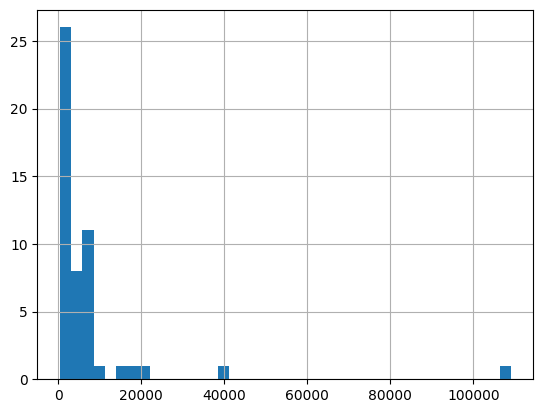

In [149]:
# clear the plot
plt.clf()

# plot the distribution of individuals on each state
homelessness["individuals"].hist(bins=40)
plt.show()

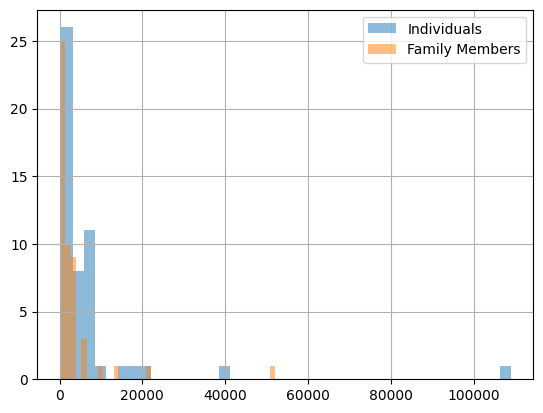

In [150]:
plt.clf()

homelessness["individuals"].hist(bins = 40, alpha = 0.5)
homelessness["family_members"].hist(bins = 40, alpha = 0.5)

plt.legend(["Individuals", "Family Members"])
plt.show()

### Bar plots

Bar plots are amazing to show the relationship between a categorical variable and a numerical one

In [151]:
plt.clf()

avg_individuals_by_region = homelessness.groupby("region")["individuals"].mean()
avg_individuals_by_region

region
East North Central     5081.200000
East South Central     3117.000000
Mid-Atlantic          18012.666667
Mountain               3561.375000
New England            2150.500000
Pacific               28427.200000
South Atlantic         5806.666667
West North Central     1995.857143
West South Central     6710.500000
Name: individuals, dtype: float64

<Figure size 640x480 with 0 Axes>

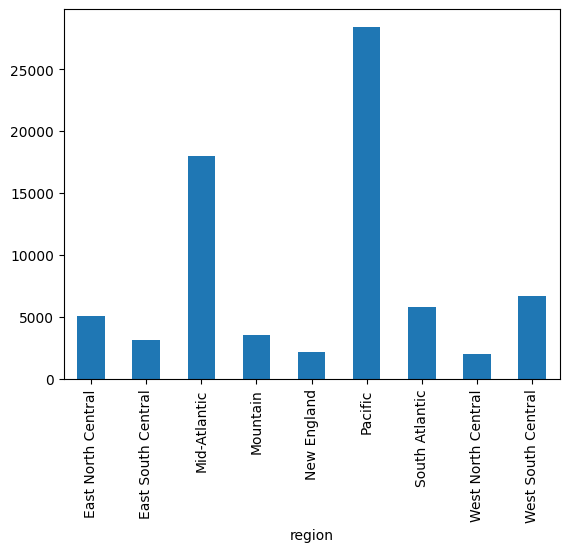

In [152]:
avg_individuals_by_region.plot(kind = "bar")
plt.show()

### Line plots

Line plots are great for visualizing changes of a numeric variable over time, or another continuous variable

### Scatter plots

They are great for relation between 2 nuemeric variables

<Figure size 640x480 with 0 Axes>

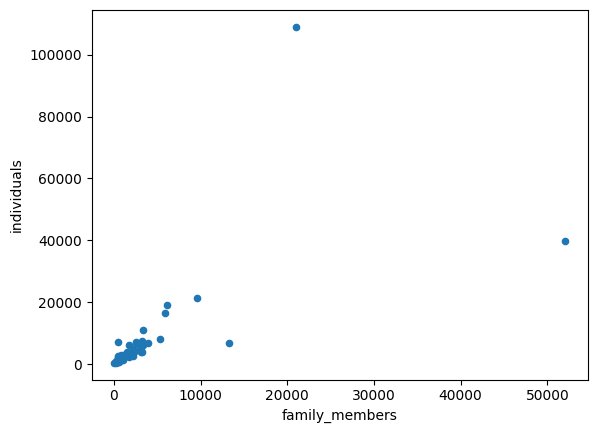

In [153]:
plt.clf()
homelessness.plot(
    x = "family_members",
    y = "individuals",
    kind = "scatter"
)
plt.show()

## Detecting missing values

Pandas adds a `NaN` to the cells where there is no value present. The `.isna()` function can provide information about wether a series or dataframe has missing values or not.

In [154]:
# isna() returns a dataframe of booleans, where True means that there is a NaN value
homelessness.isna().head()

,region,state,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
50,False,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
34,False,False,False,False,False,False,False,False


In [155]:
# To get insight on which column has NaN values
homelessness.isna().any()

region            False
state             False
individuals       False
family_members    False
state_pop         False
total             False
p_individuals     False
cum_state_pop     False
dtype: bool

In [156]:
# Get the count of NaN values
homelessness.isna().sum()

region            0
state             0
individuals       0
family_members    0
state_pop         0
total             0
p_individuals     0
cum_state_pop     0
dtype: int64

### What to do with missing data?

#### Option 1 - Remove the whole row

In [157]:
clean_homelessness = homelessness.dropna()
clean_homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
50,Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
45,New England,Vermont,780.0,511.0,624358,1291.0,0.604183,1201959
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,1903506
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645
34,West North Central,North Dakota,467.0,75.0,758080,542.0,0.861624,3396725


Removing rows with missing data seems dangerous because it can result in removing too many rows in practice. It can also introduce some bias if the missing values are not missing at random.

Proceed with this option if there seems to be few rows with missing values

#### Option 2 - Replace missing values

In [158]:
clean_homelessness = homelessness.fillna(0)
clean_homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,cum_state_pop
50,Mountain,Wyoming,434.0,205.0,577601,639.0,0.679186,577601
45,New England,Vermont,780.0,511.0,624358,1291.0,0.604183,1201959
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,1903506
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,2638645
34,West North Central,North Dakota,467.0,75.0,758080,542.0,0.861624,3396725


#### Option 3 - Think!

There are many more smarter ways to clean missing data.